In [1]:
# chat links:
# https://chatgpt.com/c/679db3e1-2e24-800a-8dd0-ac981e812260
# https://chatgpt.com/c/679db47b-f4ec-800a-a4b8-0d9c4b666d79 [Step 4: Conduct Statistical Analysis]

# https://chat.deepseek.com/a/chat/s/d3558245-2f0b-488f-a2fb-f874378a748e

In [2]:
# chat: to prompt - plan out how to analyse this data step by step

In [3]:
# Import libraries
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("cleaned_students_data4.csv")

In [4]:
# Display data types of each column
print(data.dtypes)

MARITAL_STATUS                             object
APPLICATION_MODE                           object
APPLICATION_ORDER                          object
COURSE                                     object
DAYTIME/EVENING_ATTENDANCE                 object
PREVIOUS_QUALIFICATION                     object
PREVIOUS_QUALIFICATION_(GRADE)            float64
NATIONALITY                                object
MOTHER_QUALIFICATION                       object
FATHER_QUALIFICATION                       object
MOTHER_OCCUPATION                          object
FATHER_OCCUPATION                          object
ADMISSION_GRADE                           float64
DISPLACED                                  object
EDUCATIONAL_SPECIAL_NEEDS                  object
DEBTOR                                     object
TUITION_FEES_UP_TO_DATE                    object
GENDER                                     object
SCHOLARSHIP_HOLDER                         object
AGE_AT_ENROLLMENT                           int64


In [5]:
# Descriptive statistics
print(data.describe())

       PREVIOUS_QUALIFICATION_(GRADE)  ADMISSION_GRADE  AGE_AT_ENROLLMENT  \
count                     1228.000000      1228.000000        1228.000000   
mean                       131.206026       125.863111          19.784202   
std                         11.289221        11.598234           2.309015   
min                        105.000000        95.000000          17.000000   
25%                        123.000000       117.900000          18.000000   
50%                        131.000000       125.000000          19.000000   
75%                        138.000000       133.200000          20.000000   
max                        162.000000       157.900000          31.000000   

       CURRICULAR_UNITS_1ST_SEM_(ENROLLED)  \
count                          1228.000000   
mean                              5.995928   
std                               0.075421   
min                               5.000000   
25%                               6.000000   
50%                           

In [22]:
# Summary Statistics for Numerical Columns
numerical_summary = data.describe().loc[['mean', '50%', 'min', 'max']]
numerical_summary.rename(index={'50%': 'median'}, inplace=True)
print("Summary Statistics for Numerical Columns:")
print(numerical_summary)

Summary Statistics for Numerical Columns:
        PREVIOUS_QUALIFICATION_(GRADE)  ADMISSION_GRADE  AGE_AT_ENROLLMENT  \
mean                        131.206026       125.863111          19.784202   
median                      131.000000       125.000000          19.000000   
min                         105.000000        95.000000          17.000000   
max                         162.000000       157.900000          31.000000   

        CURRICULAR_UNITS_1ST_SEM_(ENROLLED)  \
mean                               5.995928   
median                             6.000000   
min                                5.000000   
max                                7.000000   

        CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)  \
mean                                  8.167752   
median                                8.000000   
min                                   5.000000   
max                                  16.000000   

        CURRICULAR_UNITS_1ST_SEM_(APPROVED)  CURRICULAR_UNITS_1ST_SEM_(GRADE)  \

In [25]:
# Summary Statistics for Numerical Columns
numerical_summary = data[['ADMISSION_GRADE', 'AGE_AT_ENROLLMENT']].describe().loc[['mean', '50%', 'min', 'max']]
numerical_summary.rename(index={'50%': 'median'}, inplace=True)
print("Summary Statistics for Numerical Columns:")
print(numerical_summary)

Summary Statistics for Numerical Columns:
        ADMISSION_GRADE  AGE_AT_ENROLLMENT
mean         125.863111          19.784202
median       125.000000          19.000000
min           95.000000          17.000000
max          157.900000          31.000000


In [23]:
# Summary Statistics for Categorical Columns: Frequency Counts
categorical_columns = ['GENDER', 'TARGET']
categorical_summary = data[categorical_columns].apply(pd.Series.value_counts)
print("Summary Statistics for Categorical Columns: Frequency Counts")
print(categorical_summary)

Summary Statistics for Categorical Columns: Frequency Counts
          GENDER  TARGET
Dropout      NaN   224.0
Enrolled     NaN   220.0
Graduate     NaN   784.0
female     890.0     NaN
male       338.0     NaN


In [24]:
# Summary Statistics for Categorical Columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_summary = data[categorical_columns].apply(pd.Series.value_counts)
print("\nSummary Statistics for Categorical Columns:")
print(categorical_summary)


Summary Statistics for Categorical Columns:
                                                 MARITAL_STATUS  \
10th Year of Schooling                                      NaN   
12th year of schooling - not completed                      NaN   
1st phase - general contingent                              NaN   
1st phase - special contingent (Azores Island)              NaN   
1st phase - special contingent (Madeira Island)             NaN   
...                                                         ...   
single                                                   1212.0   
sixth choice                                                NaN   
third choice                                                NaN   
widower                                                     1.0   
yes                                                         NaN   

                                                 APPLICATION_MODE  \
10th Year of Schooling                                        NaN   
12th year of

In [7]:
from mlxtend.frequent_patterns import apriori, association_rules

# Association Rule Learning
# Convert categorical columns to one-hot encoded format
one_hot_data = pd.get_dummies(data[categorical_columns])

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_data, min_support=0.1, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the association rules
print(rules)

                                               antecedents  \
0                                  (MARITAL_STATUS_single)   
1        (APPLICATION_MODE_1st phase - general contingent)   
2                                  (MARITAL_STATUS_single)   
3        (APPLICATION_MODE_2nd phase - general contingent)   
4                                  (MARITAL_STATUS_single)   
...                                                    ...   
7121357                                    (GENDER_female)   
7121358                     (EDUCATIONAL_SPECIAL_NEEDS_no)   
7121359  (APPLICATION_MODE_1st phase - general contingent)   
7121360                                 (INTERNATIONAL_no)   
7121361                      (TUITION_FEES_UP_TO_DATE_yes)   

                                               consequents  \
0        (APPLICATION_MODE_1st phase - general contingent)   
1                                  (MARITAL_STATUS_single)   
2        (APPLICATION_MODE_2nd phase - general contingent)   
3      

In [8]:
data.to_csv('cleaned_students_data5.csv', index=False)

In [9]:
# Skewness and Kurtosis
numeric_data = data.select_dtypes(include=[np.number])
print("Skewness:\n", numeric_data.skew())
print("Kurtosis:\n", numeric_data.kurtosis())


Skewness:
 PREVIOUS_QUALIFICATION_(GRADE)            0.301074
ADMISSION_GRADE                           0.282619
AGE_AT_ENROLLMENT                         2.234698
CURRICULAR_UNITS_1ST_SEM_(ENROLLED)      -9.351344
CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)    1.092012
CURRICULAR_UNITS_1ST_SEM_(APPROVED)      -1.690979
CURRICULAR_UNITS_1ST_SEM_(GRADE)          0.405960
CURRICULAR_UNITS_2ND_SEM_(ENROLLED)       0.000000
CURRICULAR_UNITS_2ND_SEM_(EVALUATIONS)    0.989968
CURRICULAR_UNITS_2ND_SEM_(APPROVED)      -1.349552
CURRICULAR_UNITS_2ND_SEM_(GRADE)          0.247707
UNEMPLOYMENT_RATE                         0.250383
INFLATION_RATE                            0.365141
GDP                                      -0.555551
dtype: float64
Kurtosis:
 PREVIOUS_QUALIFICATION_(GRADE)             -0.056994
ADMISSION_GRADE                            -0.137942
AGE_AT_ENROLLMENT                           5.696567
CURRICULAR_UNITS_1ST_SEM_(ENROLLED)       172.123146
CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS

Distribution of outcomes in TARGET variable:
TARGET
Graduate    63.843648
Dropout     18.241042
Enrolled    17.915309
Name: proportion, dtype: float64


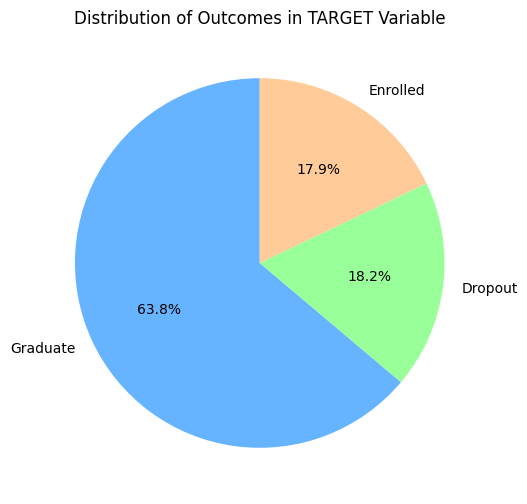

In [26]:
# Calculate the distribution of outcomes
target_distribution = data['TARGET'].value_counts(normalize=True) * 100

# Print the distribution
print("Distribution of outcomes in TARGET variable:")
print(target_distribution)

# Visualize the distribution using a pie chart
plt.figure(figsize=(8, 6))
target_distribution.plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'], startangle=90)
plt.title('Distribution of Outcomes in TARGET Variable')
plt.ylabel('')
plt.show()

Chi-Square Test for APPLICATION_MODE and TARGET: chi2=60.462653167344136, p-value=0.00014527593101346984, degrees of freedom=26
Expected frequencies:
[[1.14188925e+02 1.12149837e+02 3.99661238e+02]
 [1.82410423e+00 1.79153094e+00 6.38436482e+00]
 [3.10097720e+00 3.04560261e+00 1.08534202e+01]
 [6.69446254e+01 6.57491857e+01 2.34306189e+02]
 [5.83713355e+00 5.73289902e+00 2.04299674e+01]
 [6.93159609e+00 6.80781759e+00 2.42605863e+01]
 [1.64169381e+00 1.61237785e+00 5.74592834e+00]
 [5.47231270e-01 5.37459283e-01 1.91530945e+00]
 [2.00651466e+00 1.97068404e+00 7.02280130e+00]
 [3.64820847e-01 3.58306189e-01 1.27687296e+00]
 [1.05798046e+01 1.03908795e+01 3.70293160e+01]
 [7.29641694e-01 7.16612378e-01 2.55374593e+00]
 [8.20846906e+00 8.06188925e+00 2.87296417e+01]
 [1.09446254e+00 1.07491857e+00 3.83061889e+00]]


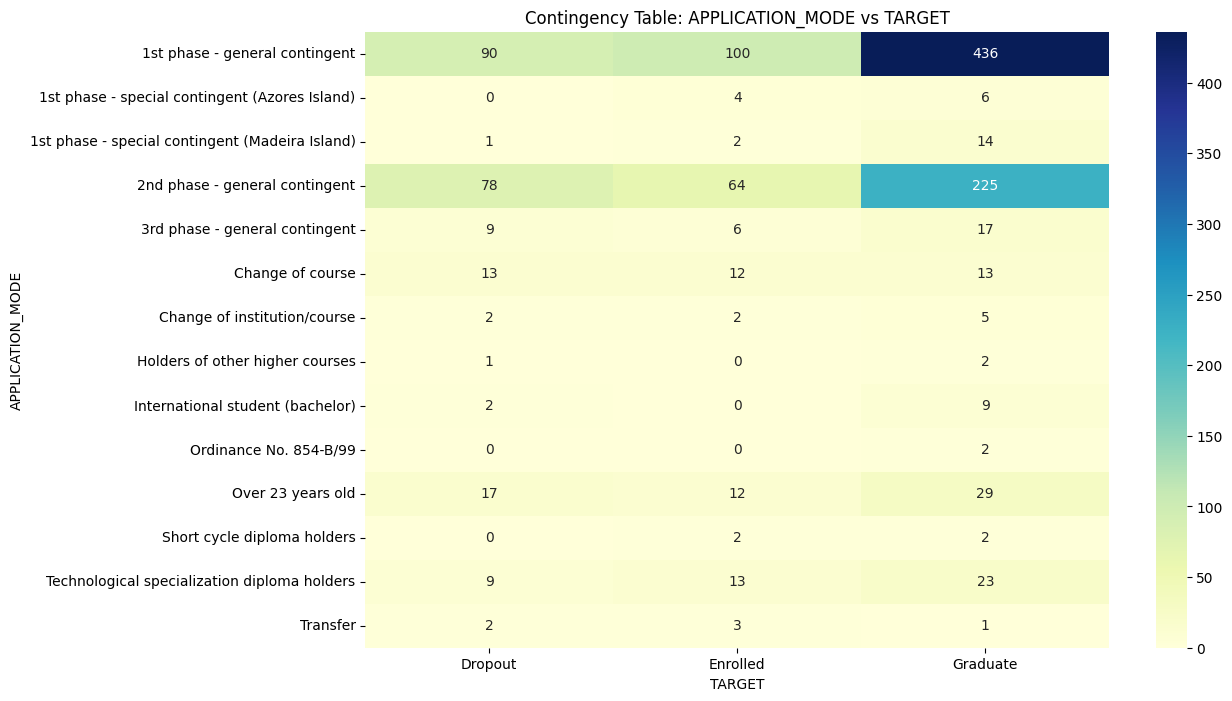

In [27]:
from scipy.stats import chi2_contingency

# Create a contingency table for APPLICATION_MODE and TARGET
application_mode_contingency_table = pd.crosstab(data['APPLICATION_MODE'], data['TARGET'])

# Perform Chi-Square Test
chi2_application_mode, p_application_mode, dof_application_mode, expected_application_mode = chi2_contingency(application_mode_contingency_table)

print(f'Chi-Square Test for APPLICATION_MODE and TARGET: chi2={chi2_application_mode}, p-value={p_application_mode}, degrees of freedom={dof_application_mode}')
print('Expected frequencies:')
print(expected_application_mode)

# Visualize the relationship using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(application_mode_contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Contingency Table: APPLICATION_MODE vs TARGET')
plt.xlabel('TARGET')
plt.ylabel('APPLICATION_MODE')
plt.show()

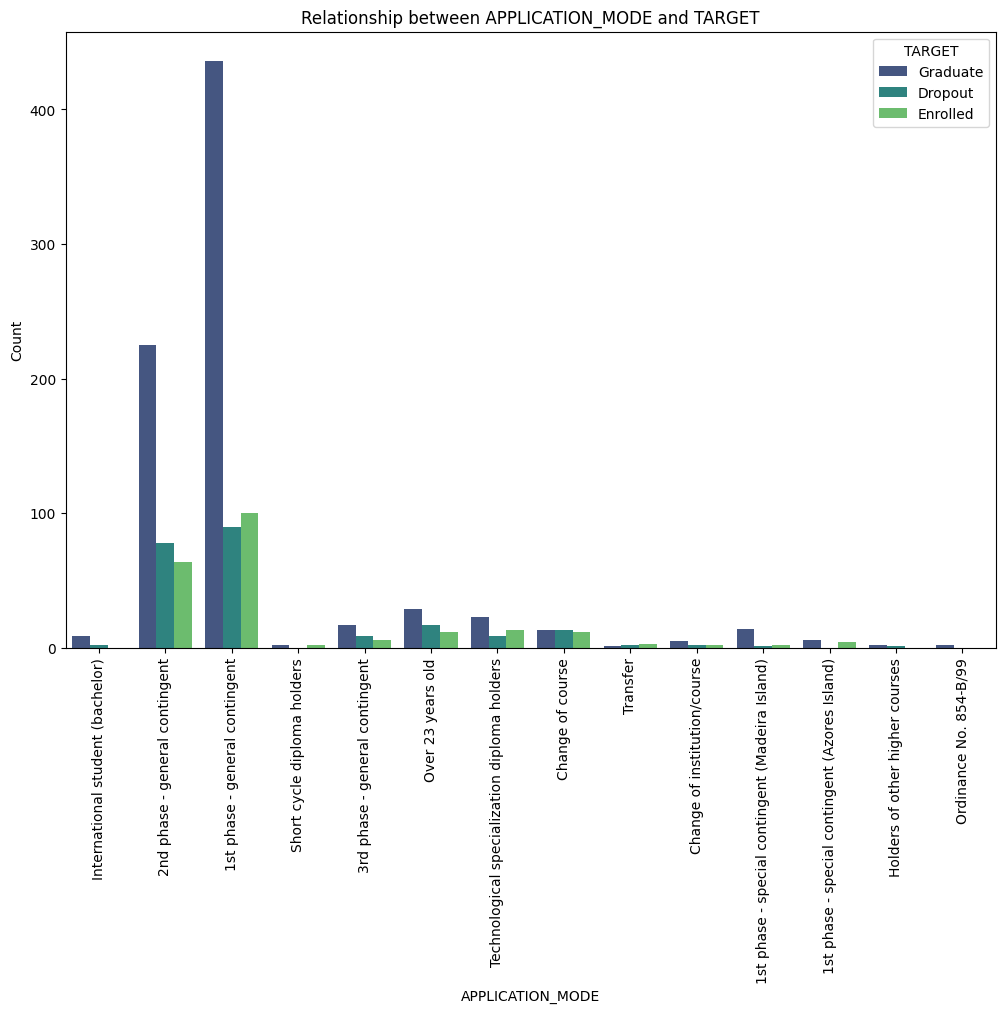

In [29]:
# Visualize the relationship using a bar plot
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='APPLICATION_MODE', hue='TARGET', palette='viridis')
plt.title('Relationship between APPLICATION_MODE and TARGET')
plt.xlabel('APPLICATION_MODE')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Chi-Square Test for GENDER and TARGET: chi2=14.874168307306963, p-value=0.0005890001299682868, degrees of freedom=2
Expected frequencies:
[[162.34527687 159.44625407 568.20846906]
 [ 61.65472313  60.55374593 215.79153094]]


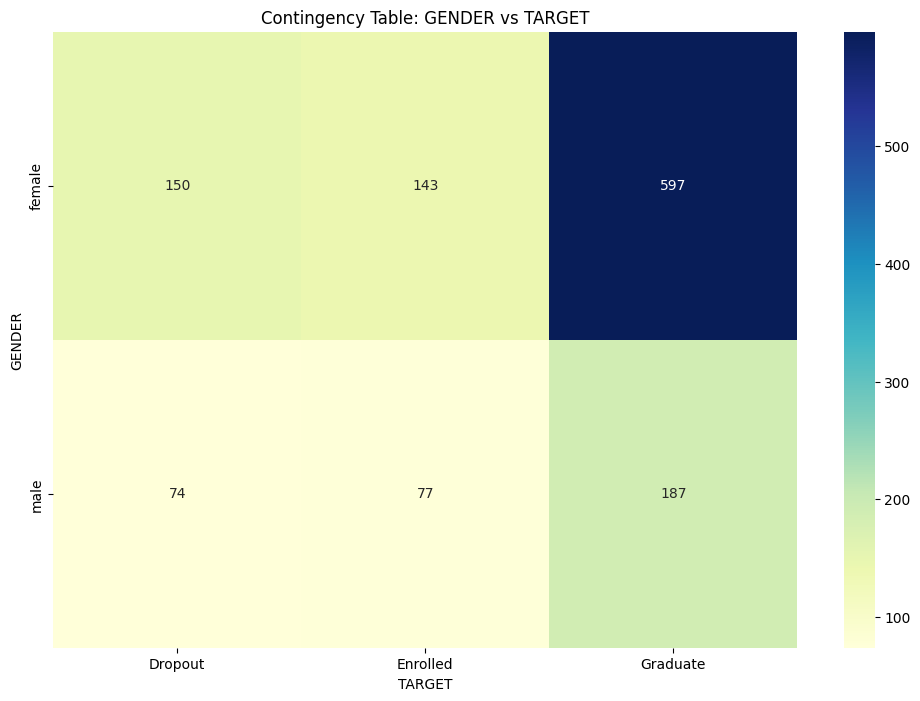

In [30]:
from scipy.stats import chi2_contingency

# Create a contingency table for GENDER and TARGET
gender_contingency_table = pd.crosstab(data['GENDER'], data['TARGET'])

# Perform Chi-Square Test
chi2_gender, p_gender, dof_gender, expected_gender = chi2_contingency(gender_contingency_table)

print(f'Chi-Square Test for GENDER and TARGET: chi2={chi2_gender}, p-value={p_gender}, degrees of freedom={dof_gender}')
print('Expected frequencies:')
print(expected_gender)

# Visualize the relationship using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(gender_contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Contingency Table: GENDER vs TARGET')
plt.xlabel('TARGET')
plt.ylabel('GENDER')
plt.show()

In [31]:
from scipy.stats import chi2_contingency

# Create a contingency table for SCHOLARSHIP_HOLDER and TARGET
scholarship_contingency_table = pd.crosstab(data['SCHOLARSHIP_HOLDER'], data['TARGET'])

# Perform Chi-Square Test for SCHOLARSHIP_HOLDER
chi2_scholarship, p_scholarship, dof_scholarship, expected_scholarship = chi2_contingency(scholarship_contingency_table)

print(f'Chi-Square Test for SCHOLARSHIP_HOLDER and TARGET: chi2={chi2_scholarship}, p-value={p_scholarship}, degrees of freedom={dof_scholarship}')
print('Expected frequencies:')
print(expected_scholarship)

# Create a contingency table for DEBTOR and TARGET
debtor_contingency_table = pd.crosstab(data['DEBTOR'], data['TARGET'])

# Perform Chi-Square Test for DEBTOR
chi2_debtor, p_debtor, dof_debtor, expected_debtor = chi2_contingency(debtor_contingency_table)

print(f'Chi-Square Test for DEBTOR and TARGET: chi2={chi2_debtor}, p-value={p_debtor}, degrees of freedom={dof_debtor}')
print('Expected frequencies:')
print(expected_debtor)

Chi-Square Test for SCHOLARSHIP_HOLDER and TARGET: chi2=65.96524992687463, p-value=4.740541792894377e-15, degrees of freedom=2
Expected frequencies:
[[146.84039088 144.21824104 513.94136808]
 [ 77.15960912  75.78175896 270.05863192]]
Chi-Square Test for DEBTOR and TARGET: chi2=102.39191680388505, p-value=5.832809200726859e-23, degrees of freedom=2
Expected frequencies:
[[201.74592834 198.14332248 706.11074919]
 [ 22.25407166  21.85667752  77.88925081]]


C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_79980\863657474.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='TARGET', y='ADMISSION_GRADE', palette='viridis')


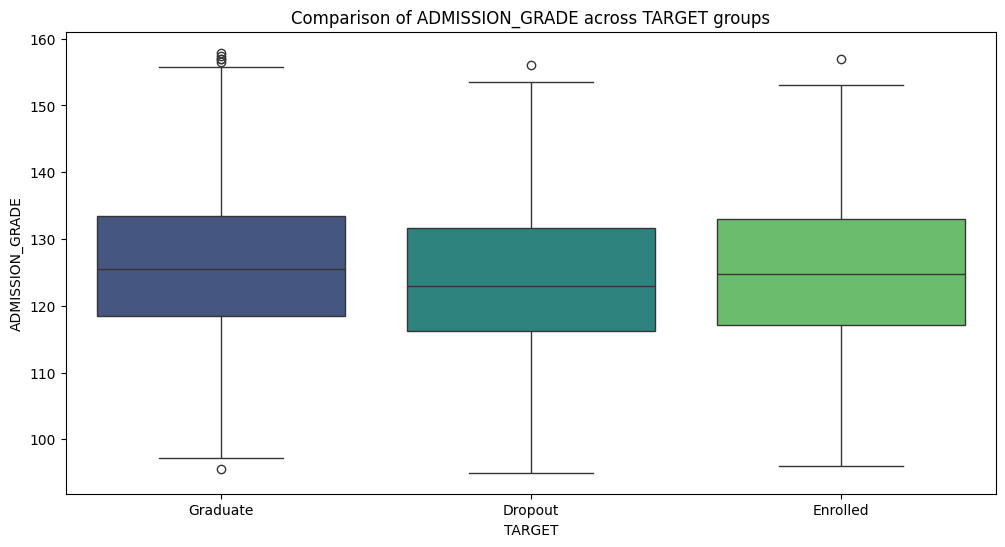

C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_79980\863657474.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='TARGET', y='CURRICULAR_UNITS_1ST_SEM_(GRADE)', palette='viridis')


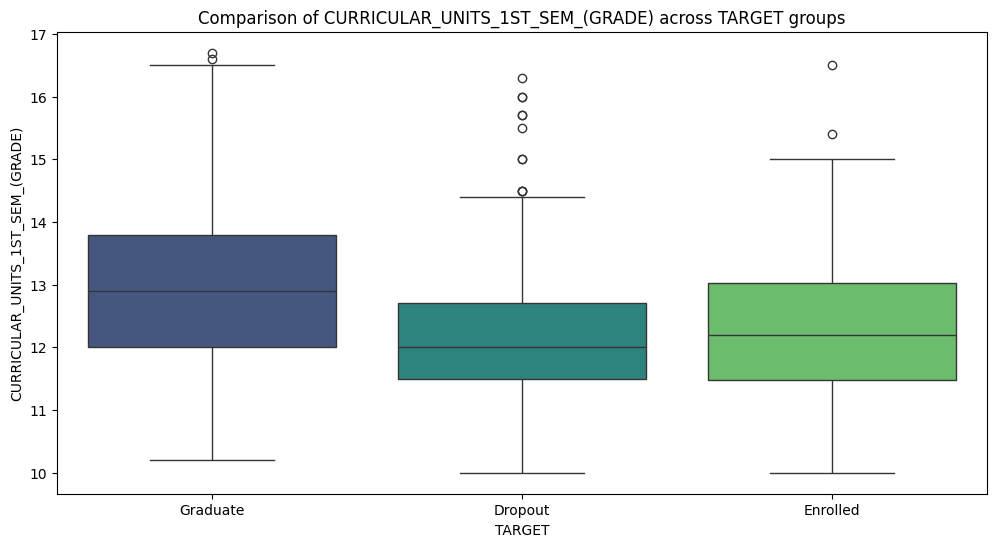

In [32]:
import seaborn as sns

import matplotlib.pyplot as plt

# Compare ADMISSION_GRADE across TARGET groups
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='TARGET', y='ADMISSION_GRADE', palette='viridis')
plt.title('Comparison of ADMISSION_GRADE across TARGET groups')
plt.xlabel('TARGET')
plt.ylabel('ADMISSION_GRADE')
plt.show()

# Compare CURRICULAR_UNITS_1ST_SEM_(GRADE) across TARGET groups
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='TARGET', y='CURRICULAR_UNITS_1ST_SEM_(GRADE)', palette='viridis')
plt.title('Comparison of CURRICULAR_UNITS_1ST_SEM_(GRADE) across TARGET groups')
plt.xlabel('TARGET')
plt.ylabel('CURRICULAR_UNITS_1ST_SEM_(GRADE)')
plt.show()

In [33]:
# Convert TARGET to numerical values
data['TARGET_NUM'] = data['TARGET'].apply(lambda x: 1 if x == 'Graduate' else (0 if x == 'Dropout' else 0.5))

# Calculate correlation coefficients
correlation_unemployment = data['UNEMPLOYMENT_RATE'].corr(data['TARGET_NUM'])
correlation_gdp = data['GDP'].corr(data['TARGET_NUM'])

print(f'Correlation between UNEMPLOYMENT_RATE and student outcomes: {correlation_unemployment}')
print(f'Correlation between GDP and student outcomes: {correlation_gdp}')

Correlation between UNEMPLOYMENT_RATE and student outcomes: 0.052368062273166226
Correlation between GDP and student outcomes: 0.06619848138497969


In [10]:
from scipy.stats import shapiro, normaltest

# Shapiro-Wilk Test for Normality
stat, p = shapiro(data["ADMISSION_GRADE"])
print(f'Shapiro-Wilk Test: Statistic={stat}, p-value={p}')

# D'Agostino and Pearson’s test
stat, p = normaltest(data["ADMISSION_GRADE"])
print(f'D\'Agostino and Pearson’s test: Statistic={stat}, p-value={p}')


Shapiro-Wilk Test: Statistic=0.9913172721862793, p-value=1.2196594525448745e-06
D'Agostino and Pearson’s test: Statistic=16.897734836633326, p-value=0.00021414281230141747


                                        PREVIOUS_QUALIFICATION_(GRADE)  \
PREVIOUS_QUALIFICATION_(GRADE)                                1.000000   
ADMISSION_GRADE                                               0.718351   
AGE_AT_ENROLLMENT                                            -0.046067   
CURRICULAR_UNITS_1ST_SEM_(ENROLLED)                           0.045017   
CURRICULAR_UNITS_1ST_SEM_(EVALUATIONS)                       -0.066464   
CURRICULAR_UNITS_1ST_SEM_(APPROVED)                           0.106125   
CURRICULAR_UNITS_1ST_SEM_(GRADE)                              0.244511   
CURRICULAR_UNITS_2ND_SEM_(ENROLLED)                                NaN   
CURRICULAR_UNITS_2ND_SEM_(EVALUATIONS)                       -0.094267   
CURRICULAR_UNITS_2ND_SEM_(APPROVED)                           0.134346   
CURRICULAR_UNITS_2ND_SEM_(GRADE)                              0.231916   
UNEMPLOYMENT_RATE                                             0.067093   
INFLATION_RATE                        

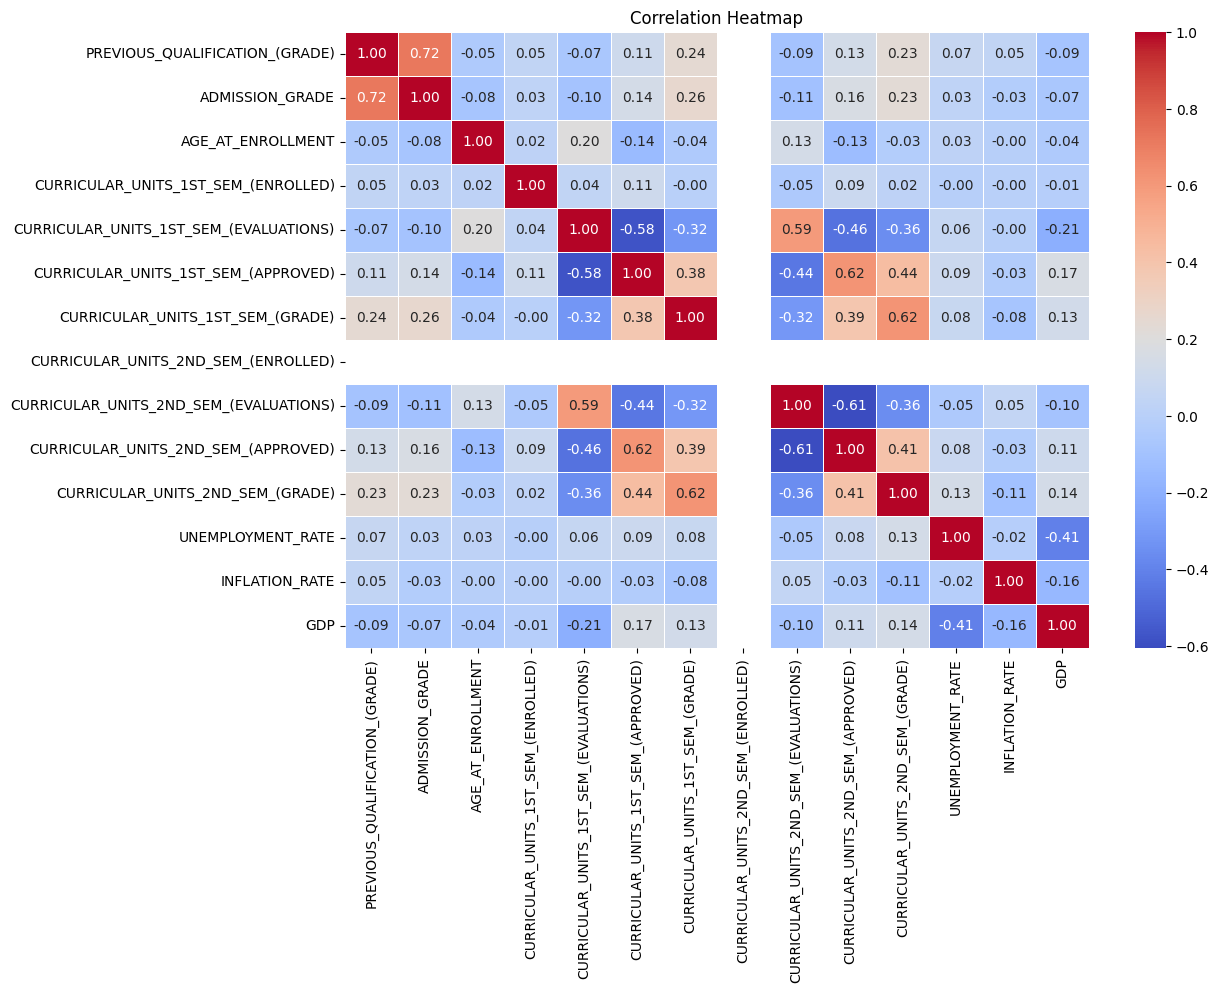

In [11]:
# Pearson Correlation Matrix
numeric_data = data.select_dtypes(include=[np.number])
print(numeric_data.corr())

# Visualizing Correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [12]:
from scipy.stats import ttest_ind

# Filter data for male and female students
male_grades = data[data['GENDER'] == 'M']['ADMISSION_GRADE'].dropna()
female_grades = data[data['GENDER'] == 'F']['ADMISSION_GRADE'].dropna()

# Perform t-test
t_stat, p_value = ttest_ind(male_grades, female_grades)

print(f'T-test: t-statistic={t_stat}, p-value={p_value}')

T-test: t-statistic=nan, p-value=nan


In [13]:
from scipy.stats import f_oneway

# Group data by COURSE and get the ADMISSION_GRADE for each group
groups = [group["ADMISSION_GRADE"].values for name, group in data.groupby("COURSE")]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

print(f'ANOVA: F-statistic={f_stat}, p-value={p_value}')

ANOVA: F-statistic=11.961620728513068, p-value=6.680112426331966e-20


In [14]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['GENDER'], data['TARGET'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Test: chi2={chi2}, p-value={p}, degrees of freedom={dof}')
print('Expected frequencies:')
print(expected)

Chi-Square Test: chi2=14.874168307306963, p-value=0.0005890001299682868, degrees of freedom=2
Expected frequencies:
[[162.34527687 159.44625407 568.20846906]
 [ 61.65472313  60.55374593 215.79153094]]


In [15]:
from scipy.stats import ttest_ind

# Filter data for male and female students
male_grades = data[data['GENDER'] == 'male']['ADMISSION_GRADE'].dropna()
female_grades = data[data['GENDER'] == 'female']['ADMISSION_GRADE'].dropna()

# Perform t-test
t_stat, p_value = ttest_ind(male_grades, female_grades)

print(f'T-test: t-statistic={t_stat}, p-value={p_value}')

T-test: t-statistic=0.45690666712478656, p-value=0.6478190735405606


In [16]:
from scipy.stats import f_oneway

# Group data by COURSE and get the ADMISSION_GRADE for each group
groups = [group["ADMISSION_GRADE"].values for name, group in data.groupby("COURSE")]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

print(f'ANOVA: F-statistic={f_stat}, p-value={p_value}')

ANOVA: F-statistic=11.961620728513068, p-value=6.680112426331966e-20


In [17]:
# Create a contingency table for SCHOLARSHIP_HOLDER and TARGET (Graduation status)
scholarship_contingency_table = pd.crosstab(data['SCHOLARSHIP_HOLDER'], data['TARGET'])

# Perform Chi-Square Test
chi2_scholarship, p_scholarship, dof_scholarship, expected_scholarship = chi2_contingency(scholarship_contingency_table)

print(f'Chi-Square Test for Scholarship Holder and Graduation Rates: chi2={chi2_scholarship}, p-value={p_scholarship}, degrees of freedom={dof_scholarship}')
print('Expected frequencies:')
print(expected_scholarship)

Chi-Square Test for Scholarship Holder and Graduation Rates: chi2=65.96524992687463, p-value=4.740541792894377e-15, degrees of freedom=2
Expected frequencies:
[[146.84039088 144.21824104 513.94136808]
 [ 77.15960912  75.78175896 270.05863192]]


In [18]:
import statsmodels.api as sm

# Define the dependent variable (student success)
y = data['TARGET'].apply(lambda x: 1 if x == 'Graduate' else 0)

# Define the independent variables
X = data[['ADMISSION_GRADE', 'AGE_AT_ENROLLMENT', 'SCHOLARSHIP_HOLDER', 'UNEMPLOYMENT_RATE', 'INFLATION_RATE', 'GDP']]

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Handle missing values
# Ensure all values are numeric and handle non-numeric values
X = X.fillna(0)
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Add a constant to the model
X = sm.add_constant(X)

# Convert to numpy array to avoid ValueError
X = np.asarray(X, dtype=np.float64)
y = np.asarray(y).astype(np.float64)

# Fit the regression model
model = sm.Logit(y, X).fit()

# Print the summary of the regression model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.607266
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1228
Model:                          Logit   Df Residuals:                     1221
Method:                           MLE   Df Model:                            6
Date:                Sat, 01 Feb 2025   Pseudo R-squ.:                 0.07190
Time:                        17:33:23   Log-Likelihood:                -745.72
converged:                       True   LL-Null:                       -803.50
Covariance Type:            nonrobust   LLR p-value:                 1.402e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3400      0.946     -0.359      0.719      -2.194       1.514
x1             0.0160      0.

In [19]:
import statsmodels.api as sm

# Define the dependent variable (dropout status)
y_dropout = data['TARGET'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Define the independent variables (economic factors)
X_economic = data[['UNEMPLOYMENT_RATE', 'GDP']]

# Add a constant to the model
X_economic = sm.add_constant(X_economic)

# Convert to numpy array to avoid ValueError
X_economic = np.asarray(X_economic, dtype=np.float64)
y_dropout = np.asarray(y_dropout).astype(np.float64)

# Fit the logistic regression model
model_economic = sm.Logit(y_dropout, X_economic).fit()

# Print the summary of the regression model
print(model_economic.summary())

Optimization terminated successfully.
         Current function value: 0.473443
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1228
Model:                          Logit   Df Residuals:                     1225
Method:                           MLE   Df Model:                            2
Date:                Sat, 01 Feb 2025   Pseudo R-squ.:                0.003339
Time:                        17:33:23   Log-Likelihood:                -581.39
converged:                       True   LL-Null:                       -583.34
Covariance Type:            nonrobust   LLR p-value:                    0.1426
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9486      0.365     -2.597      0.009      -1.664      -0.233
x1            -0.0466      0.

COURSE
Social Service                          0.797521
Social Service (evening attendance)     0.769231
Journalism and Communication            0.713725
Communication Design                    0.704918
Veterinary Nursing                      0.677419
Advertising and Marketing Management    0.595420
Tourism                                 0.551724
Agronomy                                0.539683
Equinculture                            0.416667
Basic Education                         0.280000
Informatics Engineering                 0.000000
Name: TARGET, dtype: float64


C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_79980\1241791099.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_rates.index, y=success_rates.values, palette="viridis")


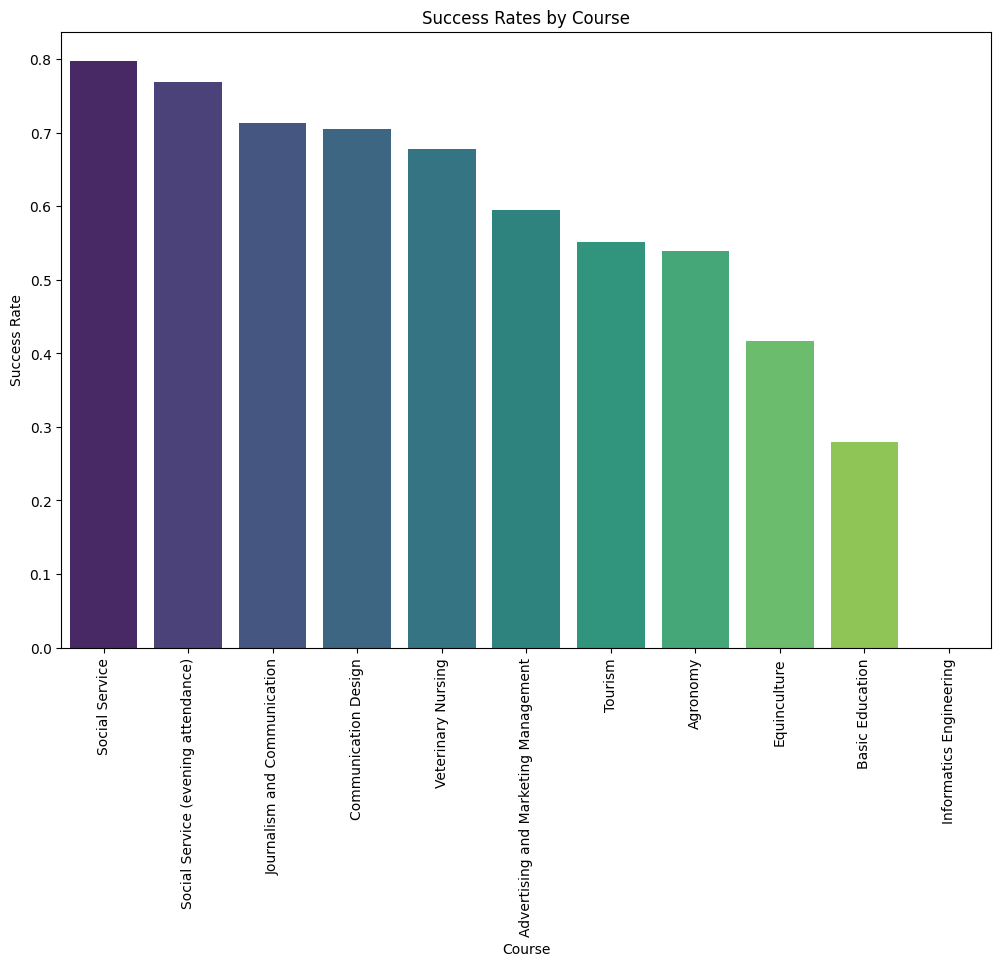

In [20]:
# Calculate success rates for each course
success_rates = data.groupby('COURSE')['TARGET'].apply(lambda x: (x == 'Graduate').mean())

# Sort success rates in descending order
success_rates = success_rates.sort_values(ascending=False)

# Print the success rates
print(success_rates)

# Visualize the success rates
plt.figure(figsize=(12, 8))
sns.barplot(x=success_rates.index, y=success_rates.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Course')
plt.ylabel('Success Rate')
plt.title('Success Rates by Course')
plt.show()

In [21]:
# research questions:
# Do male and female students have significantly different admission grades?
# Do different courses have significantly different admission grades?
# Is scholarship holding associated with graduation rates?

# interpretations:
# Which factors significantly impact student success?
# Are economic factors (unemployment, GDP) influencing dropout rates?
# Do certain courses have higher success rates?